# Overview

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

**Objective**

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not

**Key Questions**

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


# 1. Data Understanding and Exploration

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics


# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.reset_defaults
plt.style.use('fivethirtyeight')
#Setting the columns that can be displayed to max as 500 and rows to 300
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [92]:
housing_df= pd.read_csv('train.csv')

In [93]:
housing_df.shape

(1460, 81)

In [94]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Data Cleansing and Imputation

There are 3 steps that we will do here so that we have a clean set of data to work with :
1. Data Type Correction - Correction of all variables which are incorrectily marked categorical/continuos
2. Data Imputation - Analyse the Data and impute Values/remove records where prediminant gaps are there. 
3. Outlier Removal - Since the predictions are very sensitive to outliers, we will try to remove them where possible without affecting the meaning of the data
4. Data Imbalance - We will drop variables which have the same values for 80% of the data as they wont contribute meaningfully to the target variable prediction


## Data Type Correction ##
Few Features are categorical and incorrectly marked as continuous. So we will convert them to the same later. Lets remove them from the explorations

- MSSubClass: Identifies the type of dwelling involved in the sale
-OverallQual: Rates the overall material and finish of the house
-OverallCond: Rates the overall condition of the house
-YearBuilt: Original construction date
-YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)  
-BsmtFullBath : Basement full bathrooms
-BsmtHalfBath : Basement half bathrooms
-FullBath : Full bathrooms above grade
-HalfBath: Half baths above grade
-BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
-KitchenAbvGr :  Kitchens above grade
-TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
-Fireplaces : Number of fireplaces
-GarageYrBlt : Year garage was built
-GarageCars: Size of garage in car capacity
-MoSold: Month Sold (MM)
-YrSold : Year Sold (YYYY)


In [96]:
change_data_type_feat=['MSSubClass','OverallQual','OverallCond','YearBuilt' ,'YearRemodAdd' ,'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                     'Fireplaces' , 'GarageYrBlt','GarageCars', 'MoSold', 'YrSold']


In [97]:
#First we will convert the data types which were converted into Int/Floats back to objects so that we have a complete datasets
print(housing_df.shape)
print("Columns to be converted to Categorical ",change_data_type_feat)
housing_df[change_data_type_feat] = housing_df[change_data_type_feat].astype(object)

(1460, 81)
Columns to be converted to Categorical  ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']


In [98]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## Data Imputation

**Continuous Features Imputation**

In [99]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])

missing_numeric_null_prcnt = round(100*housing_numeric.isnull().sum()/len(housing_numeric.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

LotFrontage    17.74
MasVnrArea      0.55
dtype: float64

In [100]:
housing_numeric.LotFrontage.describe()
#Mean or Median Imputation is fine

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [101]:
housing_numeric.MasVnrArea.describe()
#Median Imputation is desirable

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [102]:
#The values are spread out and can be replaced with the median

housing_df['LotFrontage'] =housing_df['LotFrontage'].replace(np.nan, housing_df['LotFrontage'].median())
#housing_df['LotFrontage'].value_counts()
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, housing_df['MasVnrArea'].median())

**Categorical Variables Imputation**

In [103]:
#Lets first Analyse the Null Values and see Data can be imputed for Categorical Variables
housing_cat = housing_df.select_dtypes(include=['object'])
housing_cat.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageYrBlt        81
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtFinType1       37
BsmtQual           37
MasVnrType          8
Electrical          1
OverallQual         0
RoofMatl            0
RoofStyle           0
Exterior1st         0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
LandSlope           0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
MSZoning            0
Exterior2nd         0
SaleCondition       0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
PavedDrive          0
GarageCars          0
Fireplaces          0
Functional

In [104]:
housing_df.PoolQC.value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [105]:
housing_df.MiscFeature.value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [106]:
housing_df.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [107]:
housing_df['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [108]:
housing_df['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [109]:
housing_df['GarageCond'].value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [110]:
housing_df['BsmtExposure'].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [111]:
housing_df['BsmtCond'].value_counts(dropna=False)

#Looks like we can also replace NoBasement for all Basement Related Features

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [112]:
housing_df['MasVnrType'].value_counts(dropna=False)
## Looks like this is a typo - We will replace NaN with None

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [113]:
#Replacing NA values with more Meaningful ones from the Data Dictionary

housing_df['PoolQC'].fillna('None',inplace=True)
housing_df['MiscFeature'].fillna('None',inplace=True)
housing_df['Alley'].fillna('None',inplace=True)
housing_df['Fence'].fillna('None',inplace=True)
housing_df['FireplaceQu'].fillna('None',inplace=True)

#Garage will have NA for all related Features
housing_df['GarageCond'].fillna('None',inplace=True)
housing_df['GarageType'].fillna('None',inplace=True)
housing_df['GarageYrBlt'].fillna('None',inplace=True)
housing_df['GarageFinish'].fillna('None',inplace=True)
housing_df['GarageQual'].fillna('None',inplace=True)


housing_df['BsmtExposure'].fillna('None',inplace=True)
housing_df['BsmtFinType2'].fillna('None',inplace=True)
housing_df['BsmtFinType1'].fillna('None',inplace=True)
housing_df['BsmtCond'].fillna('None',inplace=True)
housing_df['BsmtQual'].fillna('None',inplace=True)
housing_df['BsmtQual'].fillna('None',inplace=True)
housing_df['MasVnrType'].fillna('None',inplace=True)

In [114]:
#Analyse the Null Values and see Data can be imputed
housing_df.isnull().sum().sort_values(ascending=False)

Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
OverallCond      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
ScreenPorch      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
PoolArea         0
GarageCars  

Now the data Set looks Clean. Lets now analyse the data for outliers and remove the same. If we observe a large trend of outliers we will choose to ignore them. 
We can then see if there are techniques like Data Transformation which we can use to regularize them rather than stripping the same. 


## Outlier Removal

In [115]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [116]:
#Common Function to remove outliers. We will use the Z Value to Do the same
def strip_outliers(colName, data=housing_df):
     print('Processing Field :',colName)
     print("Before : ",data.shape)
     #print(data[colName])
     data['z'] = np.abs(stats.zscore(data[colName]))
     data = data [data.z<3]
     data.drop(['z'], axis=1, inplace=True)
     print("After : ",data.shape)
     #plt.style.use('fivethirtyeight')
     #sns.boxplot(y=colName,data=data)
     #plt.show()
     return data
       



In [117]:
#Based on the above analysis outliers are there in the below fields which we will remove from the main data set 
#BsmtFinSF2,'ScreenPorch', 'MiscVal','PoolArea'
outlier_fields = ['LotFrontage','MasVnrArea','LotArea', 'BsmtUnfSF','GrLivArea', 'OpenPorchSF','SalePrice']
original_size = len(housing_df)
for field in outlier_fields :
    housing_df=strip_outliers(field, housing_df)


Processing Field : LotFrontage
Before :  (1460, 81)
After :  (1444, 81)
Processing Field : MasVnrArea
Before :  (1444, 81)
After :  (1413, 81)
Processing Field : LotArea
Before :  (1413, 81)
After :  (1399, 81)
Processing Field : BsmtUnfSF
Before :  (1399, 81)
After :  (1391, 81)
Processing Field : GrLivArea
Before :  (1391, 81)
After :  (1382, 81)
Processing Field : OpenPorchSF
Before :  (1382, 81)
After :  (1357, 81)
Processing Field : SalePrice
Before :  (1357, 81)
After :  (1340, 81)


In [118]:
#check if there is a loss of meaning after outlier stripping
retained_data = round(100*(len(housing_df)/original_size),2)
print(retained_data,"%")

91.78 %


In [119]:
#Lets look at the fields again
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,732.159701,67.999254,9466.325373,81.782090,411.673134,44.857463,556.558955,1013.089552,1119.783582,327.871642,4.610448,1452.265672,456.328358,89.498507,39.636567,22.698507,3.373881,14.078358,1.851493,45.271642,169534.841791
std,423.193826,17.961643,3886.913809,132.688837,402.357449,156.134638,425.786100,379.594321,336.888838,412.361159,41.782883,439.488828,200.916023,119.666418,52.462128,60.801039,29.177340,52.749544,34.144746,516.232009,60401.708613
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000
25%,365.750000,60.000000,7402.000000,0.000000,0.000000,0.000000,217.750000,783.750000,864.000000,0.000000,0.000000,1113.750000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128000.000000
50%,734.500000,69.000000,9205.000000,0.000000,368.000000,0.000000,479.500000,969.000000,1057.500000,0.000000,0.000000,1425.500000,468.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157250.000000
75%,1095.250000,77.000000,11211.000000,137.250000,685.000000,0.000000,801.500000,1240.000000,1329.000000,709.500000,0.000000,1718.000000,572.000000,166.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200230.750000
90%,1316.100000,89.000000,13571.200000,288.000000,998.000000,108.200000,1195.300000,1518.200000,1610.400000,900.100000,0.000000,2036.100000,691.000000,250.200000,118.100000,112.000000,0.000000,0.000000,0.000000,0.000000,257050.000000
95%,1390.050000,99.000000,15613.450000,362.150000,1172.400000,391.000000,1422.100000,1680.100000,1718.050000,1072.450000,0.000000,2267.150000,826.000000,322.100000,152.000000,184.000000,0.000000,152.050000,0.000000,0.000000,290000.000000
99%,1446.610000,120.000000,23136.750000,548.930000,1440.610000,782.030000,1692.050000,1885.470000,2055.450000,1309.660000,185.890000,2623.220000,918.710000,475.220000,211.000000,257.050000,168.000000,263.050000,0.000000,700.000000,338872.500000


**Observation** : 95% of Records are retained after stripping. This is a good result. 
Outliers have also reduced. 

## Data Imbalance Correction

We will drop Features which have more than 80% of the variables having the same value, as they will not contribute to the analysis

**Continuous Features Imbalance Correction**

In [120]:
##Removing numeric attributes that have more than 80% data associated to one single value.

def get_num_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_num_cols_imbal(data=housing_df, prcnt=80)  
print("Numeric columns removed:",num_cols_to_be_removed)
print("\nNumber of numeric columns removed: ", len(num_cols_to_be_removed),"\n")


##Dropping columns with skewed data (int and float type numeric variables)
housing_df = housing_df.drop(num_cols_to_be_removed, axis=1)
print (housing_df.shape)

Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  7 

(1340, 74)


**Categorical Features Imbalance Correction**

In [121]:
##Removing categorical features that have more than 80% data associated to one single value.

def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=housing_df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
housing_df = housing_df.drop(columns_to_be_removed, axis=1)
housing_df.head()

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  26 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,None,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,None,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,None,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,None,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,None,12,2008,250000


In [122]:
housing_df.shape

(1340, 48)

**Derived Variables** 

Now we will look at the dateFields and use them to create more meaningful Categorical Variables

The Goal is to convert the Nominal,Ordinal variables to more meaningful Increment, Ratio Variables
- #YearBuilt #YearRemodAdd #YrSold #MoSold GarageYrBlt

In [123]:
housing_df['PropertyAge'] = housing_df.YrSold - housing_df.YearBuilt
housing_df.PropertyAge = housing_df.PropertyAge.astype(int)


In [124]:
def isRemodelled(row):
    yrBuilt = row.YearBuilt
    yrRemod = row.YearRemodAdd
    if (yrBuilt==yrRemod):
        return 'No'
    elif yrBuilt<yrRemod:
        return 'Yes'
    else :
        return 'Null'
        print("Remod<Built")

housing_df['isRemodelled'] = housing_df.apply(isRemodelled, axis=1)
housing_df.isRemodelled.value_counts()

No     714
Yes    626
Name: isRemodelled, dtype: int64

<AxesSubplot:>

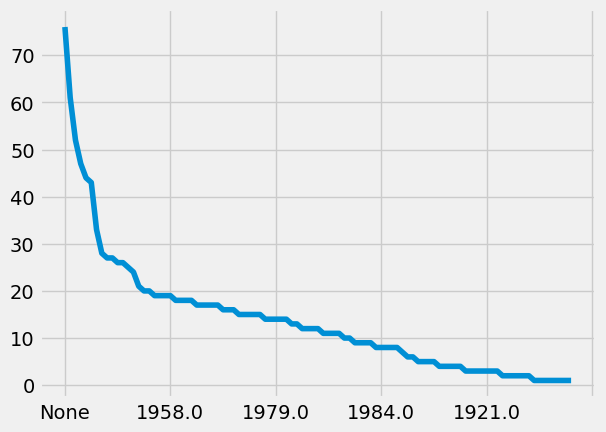

In [125]:
housing_df.GarageYrBlt.value_counts().plot()
#It looks quite sparsely distributed to meaningfully predict values, Best to drop the same. There is already of Category of GarageType which will cover the inferences from the same

In [126]:
#Lets drop the remaining variables
housing_df = housing_df.drop(['YearBuilt', 'YearRemodAdd','YrSold','GarageYrBlt'], axis=1)
housing_df = housing_df.drop(['Id'], axis=1)

In [127]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1340 non-null   object 
 1   MSZoning      1340 non-null   object 
 2   LotFrontage   1340 non-null   float64
 3   LotArea       1340 non-null   int64  
 4   LotShape      1340 non-null   object 
 5   LotConfig     1340 non-null   object 
 6   Neighborhood  1340 non-null   object 
 7   HouseStyle    1340 non-null   object 
 8   OverallQual   1340 non-null   object 
 9   OverallCond   1340 non-null   object 
 10  Exterior1st   1340 non-null   object 
 11  Exterior2nd   1340 non-null   object 
 12  MasVnrType    1340 non-null   object 
 13  MasVnrArea    1340 non-null   float64
 14  ExterQual     1340 non-null   object 
 15  Foundation    1340 non-null   object 
 16  BsmtQual      1340 non-null   object 
 17  BsmtExposure  1340 non-null   object 
 18  BsmtFinType1  1340 non-null 

# 3. Data Analysis and Preparation

In this Phase we will do : Univariate Analysis of the Numeric and Categorical Features. During this process, This will help us identify trends, and in the data and also help us cleanse some more features based on Business Understanding
1. Univariate Distribution Analysis of Continuous Variables
2. MultiVariate Correlation Analysis of Continous Variables
3. Univariate Analysis of Categorical Variables
4. Visualization of the Target Variable
5. BiVariate Analysis of Continuous Variable with Target Variable

**Univariate Distribution Analysis of Continuous Variables**

In [128]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64', 'int32', 'float32'])
len(housing_numeric.columns)


14

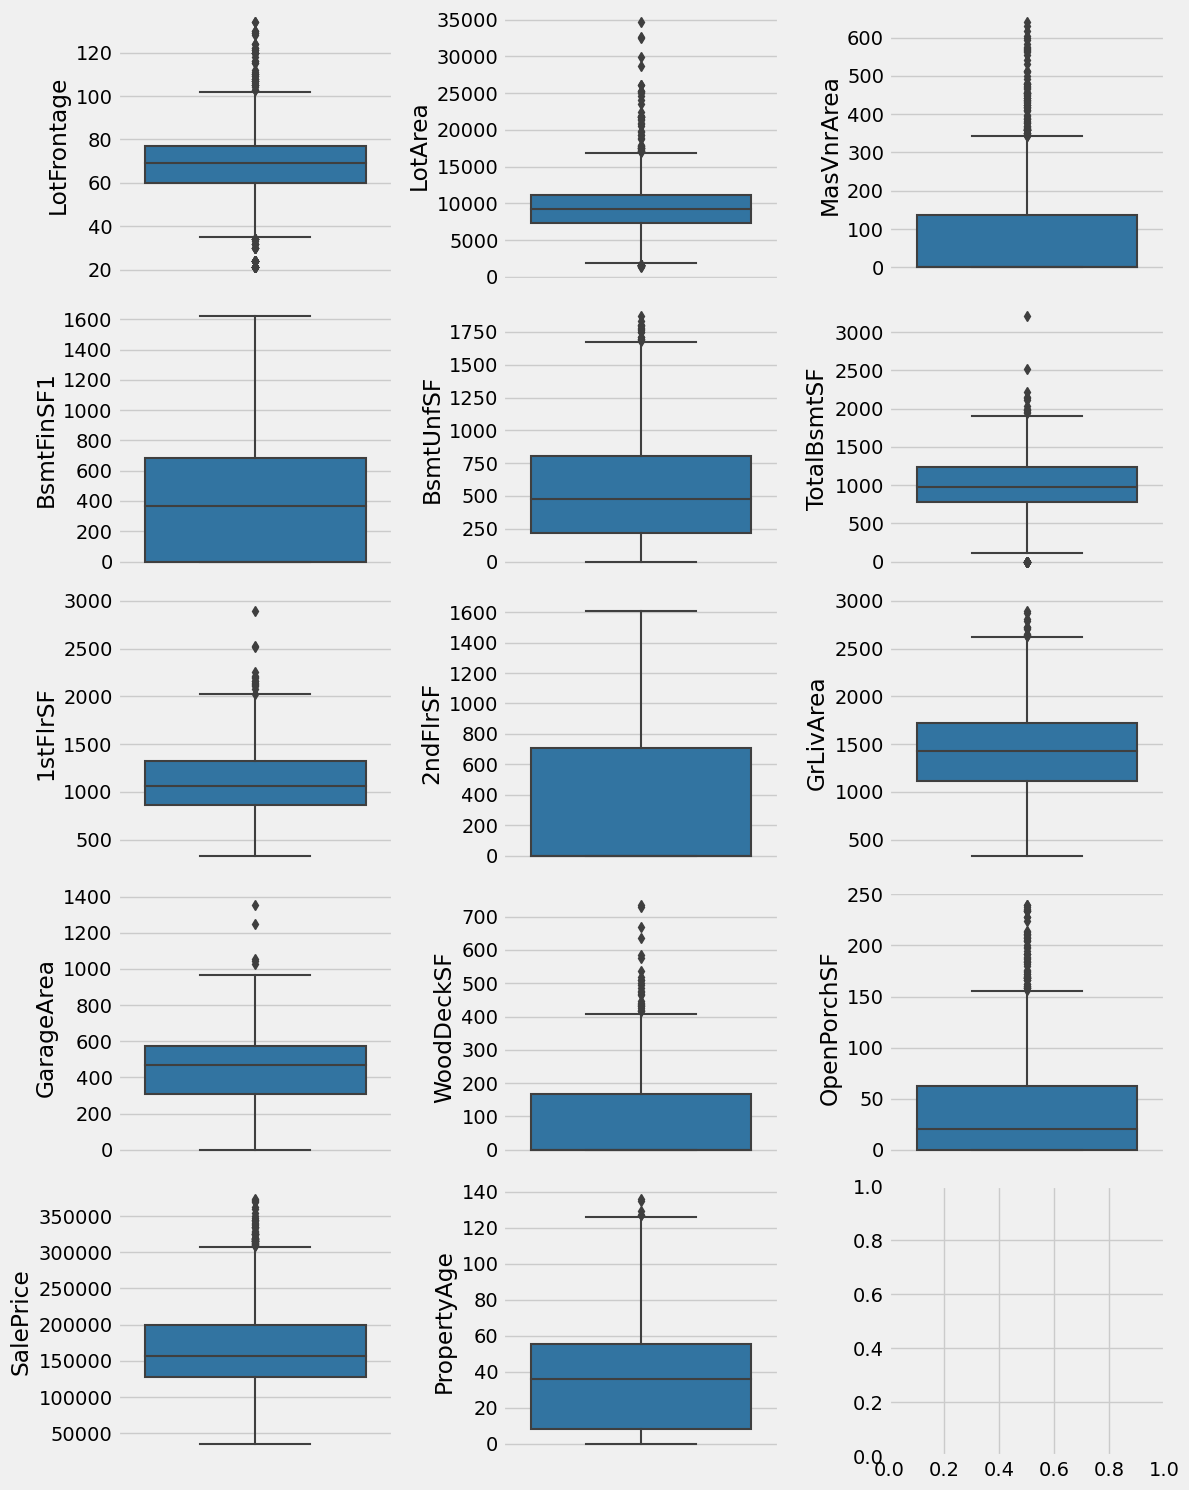

In [129]:
#Plot variables for outlier correction 

all_quant_variables = housing_numeric.columns
nr_rows =5
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
sns.reset_defaults()
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(all_quant_variables):
            sns.boxplot(y=all_quant_variables[i], data=housing_numeric, ax = axs[r][c])    
plt.tight_layout() 
plt.show()

**Observations** :
- Most of the variables looks distributed normally.
- Further elimination can be done using RFE

**BiVariate Analysis of Continuous Categorical Variables**

In [130]:
housing_df.select_dtypes(include=['object']).columns
housing_cont_cat = ['MasVnrArea','BsmtFullBath','FullBath','HalfBath',]

In [131]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1340 non-null   object 
 1   MSZoning      1340 non-null   object 
 2   LotFrontage   1340 non-null   float64
 3   LotArea       1340 non-null   int64  
 4   LotShape      1340 non-null   object 
 5   LotConfig     1340 non-null   object 
 6   Neighborhood  1340 non-null   object 
 7   HouseStyle    1340 non-null   object 
 8   OverallQual   1340 non-null   object 
 9   OverallCond   1340 non-null   object 
 10  Exterior1st   1340 non-null   object 
 11  Exterior2nd   1340 non-null   object 
 12  MasVnrType    1340 non-null   object 
 13  MasVnrArea    1340 non-null   float64
 14  ExterQual     1340 non-null   object 
 15  Foundation    1340 non-null   object 
 16  BsmtQual      1340 non-null   object 
 17  BsmtExposure  1340 non-null   object 
 18  BsmtFinType1  1340 non-null 

In [132]:
#List of categorical Columns
housing_cat = housing_df.select_dtypes(include=['object'])
housing_cat.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,Fence,MoSold,isRemodelled
0,60,RL,Reg,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,None,2,No
1,20,RL,Reg,FR2,Veenker,1Story,6,8,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,None,5,No
2,60,RL,IR1,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,None,9,Yes
3,70,RL,IR1,Corner,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,None,2,Yes
4,60,RL,IR1,FR2,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,None,12,No


In [133]:
def showbarlabel(graph, rotate=0):
    graph.set_xticklabels(graph.get_xticklabels(),rotation=rotate)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [134]:
def plot_bar(by,rotate=0):
    graph = housing_cat[by].value_counts().plot(kind='bar',ax = axs[r][c])
    showbarlabel(graph)

In [135]:
all_cat_variables = housing_cat.columns
print(len(all_cat_variables))

31


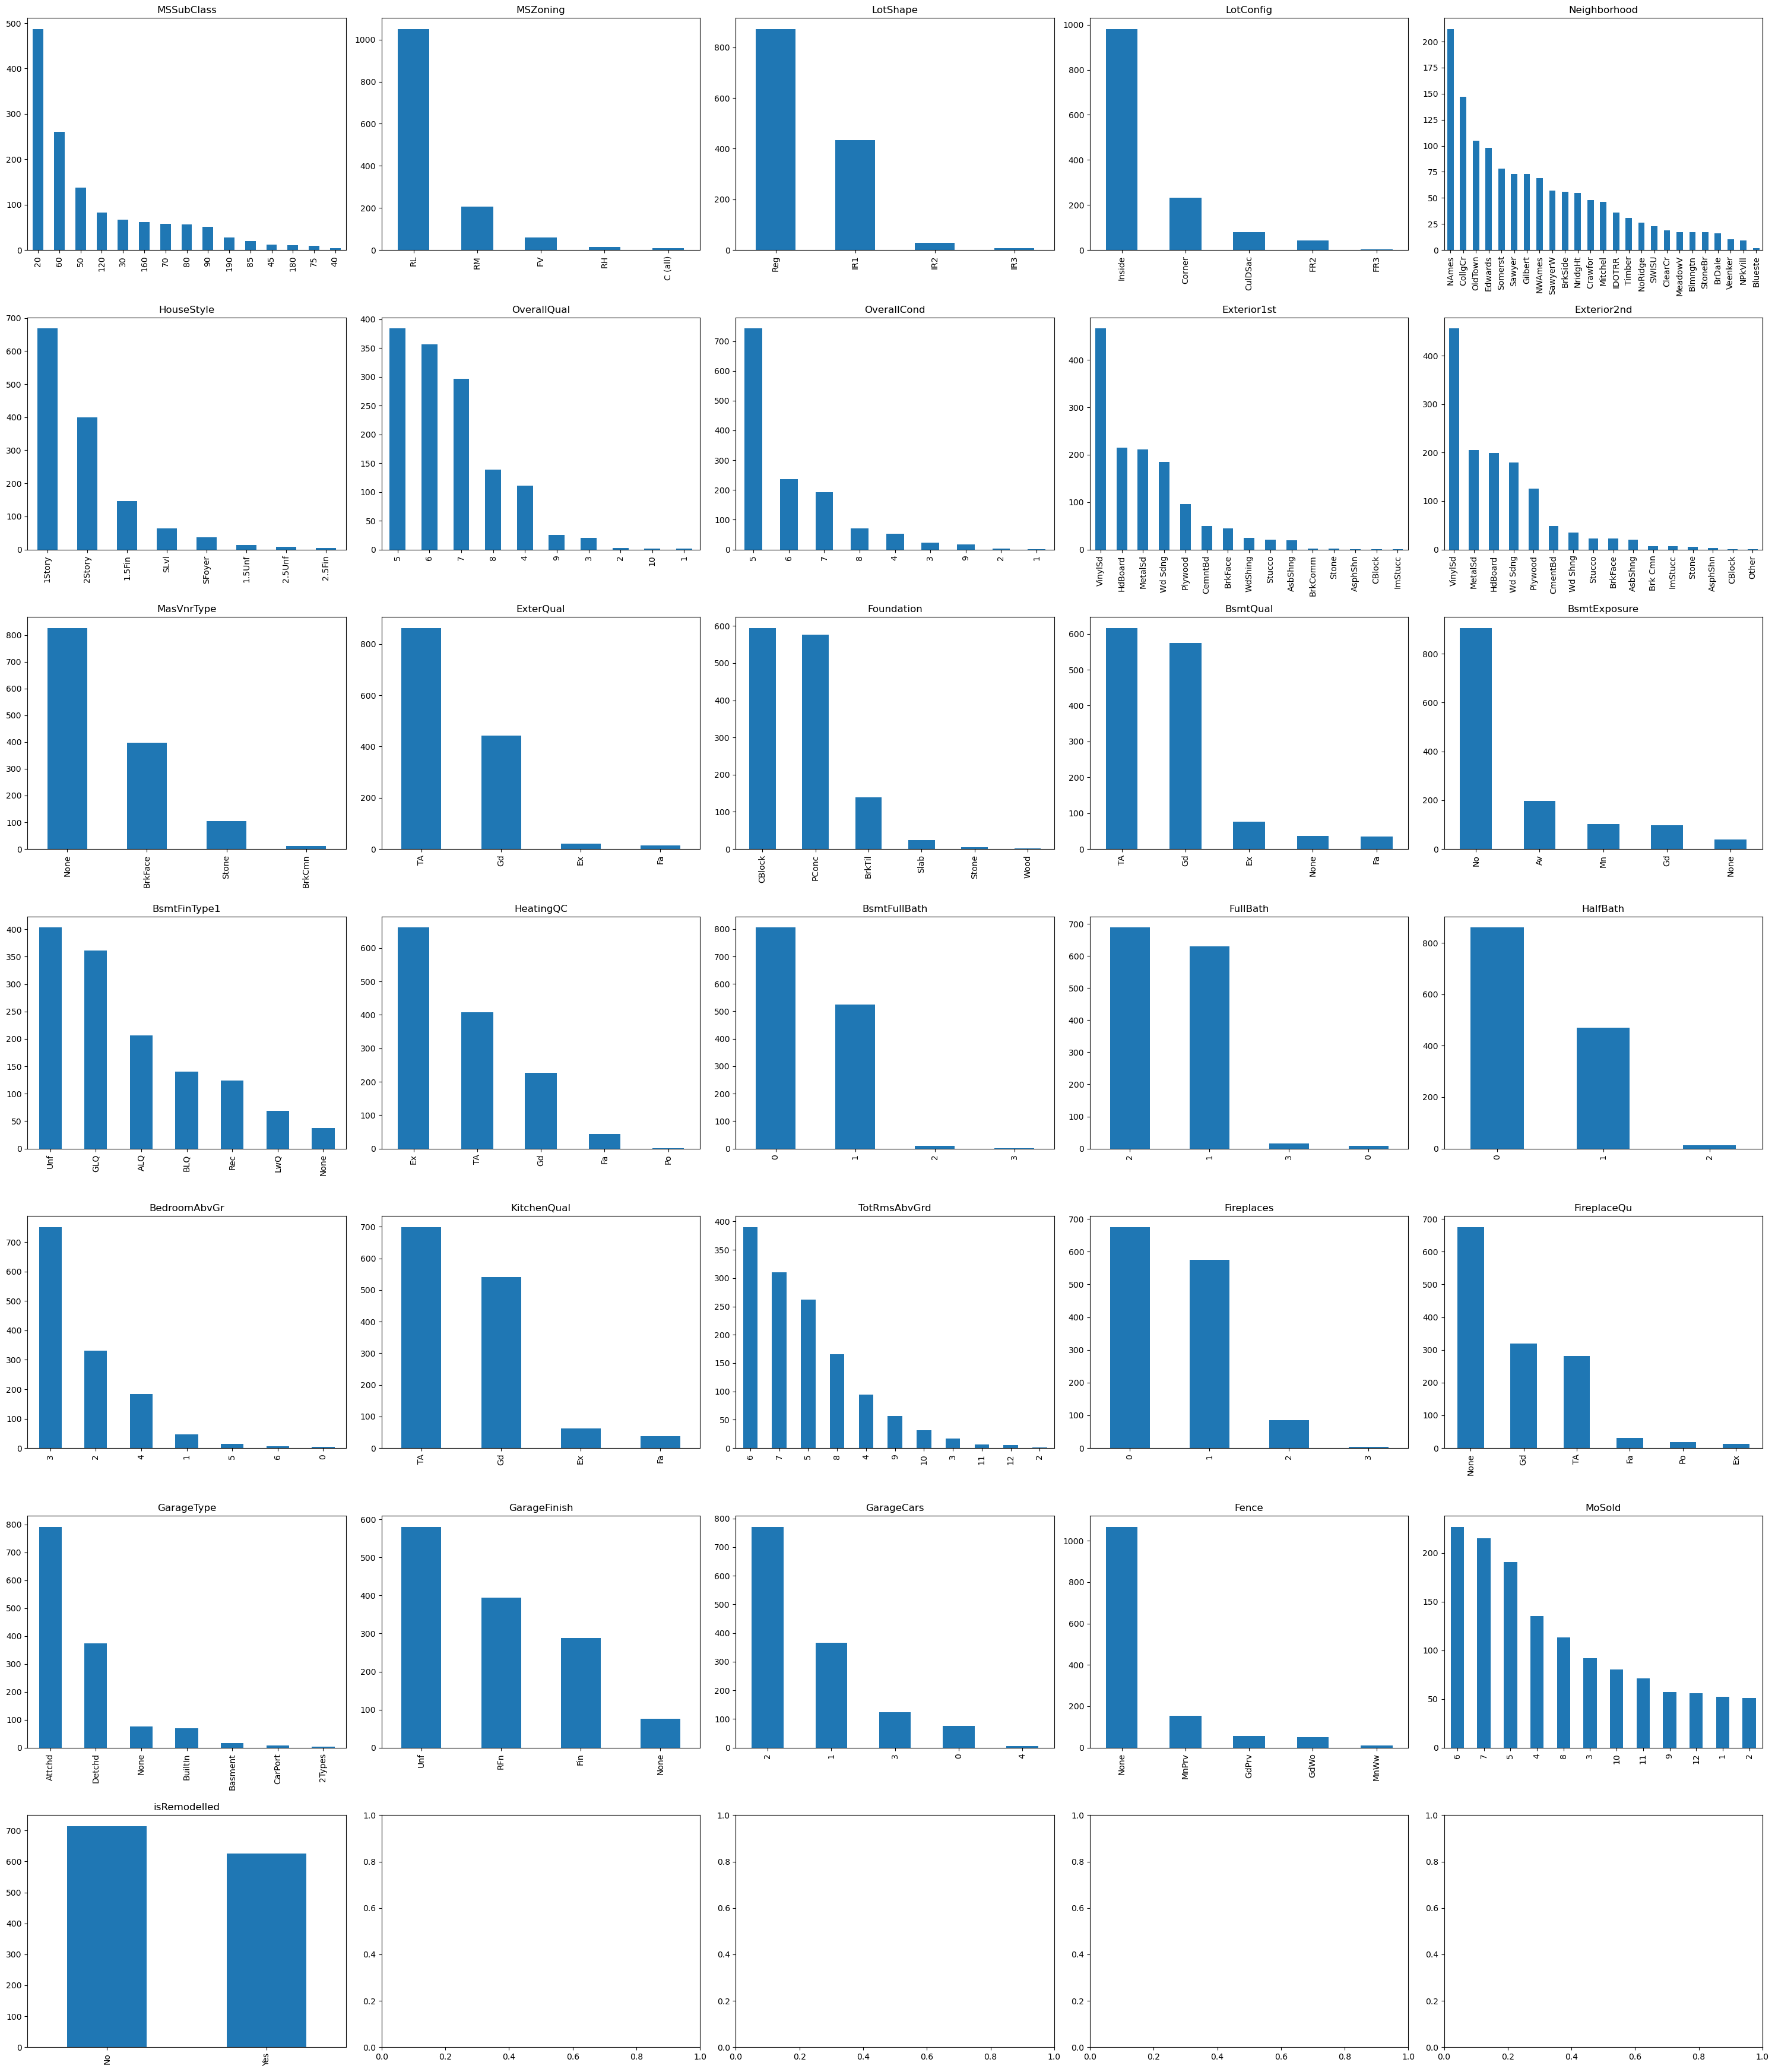

In [136]:
#Plot variables for outlier correction 

all_cat_variables = housing_cat.columns

nr_rows =7
nr_cols = 5
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*5))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(all_cat_variables):
            graph = housing_cat[all_cat_variables[i]].value_counts().plot(kind='bar',ax = axs[r][c])
            #axs[r][c].set_xlabel(housing_cat.columns[i])
            axs[r][c].set_title(housing_cat.columns[i])
            #graph.title(housing_cat.columns[i])
            #sns.barplot(y=all_cat_variables[i], data=housing_cat, ax = axs[r][c])    
plt.tight_layout() 
plt.style.use('fivethirtyeight')
plt.show()

**Visualization of the Target Variable**

mu=169534.84179104478, sigma=60379.166455677674


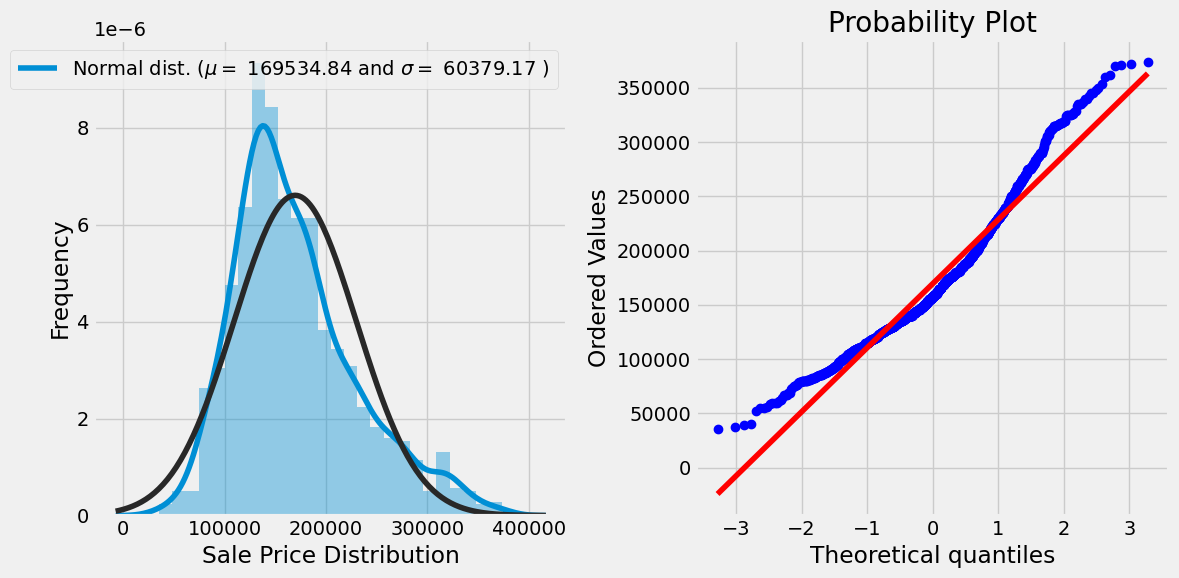

In [137]:
from scipy.stats import norm

def plot_distribution(row):
    fig, axs = plt.subplots(1,2,figsize=(12,6) )

    plt.subplot(121)
    ax = sns.distplot(row,  fit=norm)
    plt.xlabel("Sale Price Distribution")
    plt.ylabel("Frequency")
    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(row)
    print ("mu={0}, sigma={1}".format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')

    plt.subplot(122)
    res = stats.probplot(row, plot=plt)

    plt.autoscale()
    plt.tight_layout()
    plt.show()

plot_distribution(housing_df['SalePrice'])

mu=11.978636746902215, sigma=0.356465436862451


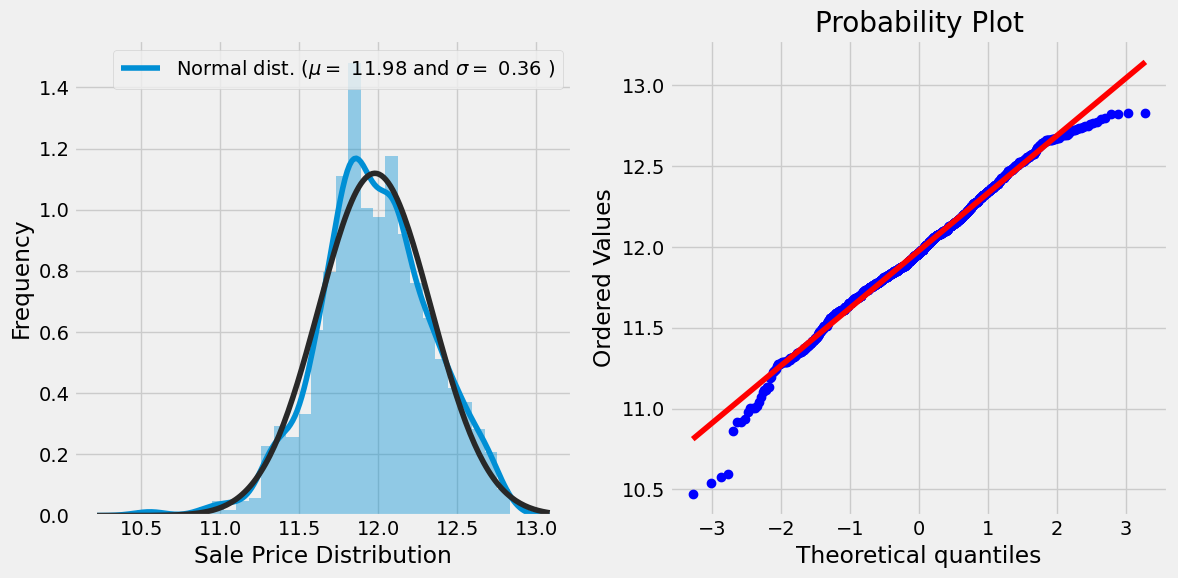

In [138]:
#converting the target Variable to Log to see if it can be normalized
log_sale_price = np.log(housing_df['SalePrice'])

plot_distribution(log_sale_price)

mu=405.45987787108237, sigma=71.67376945446448


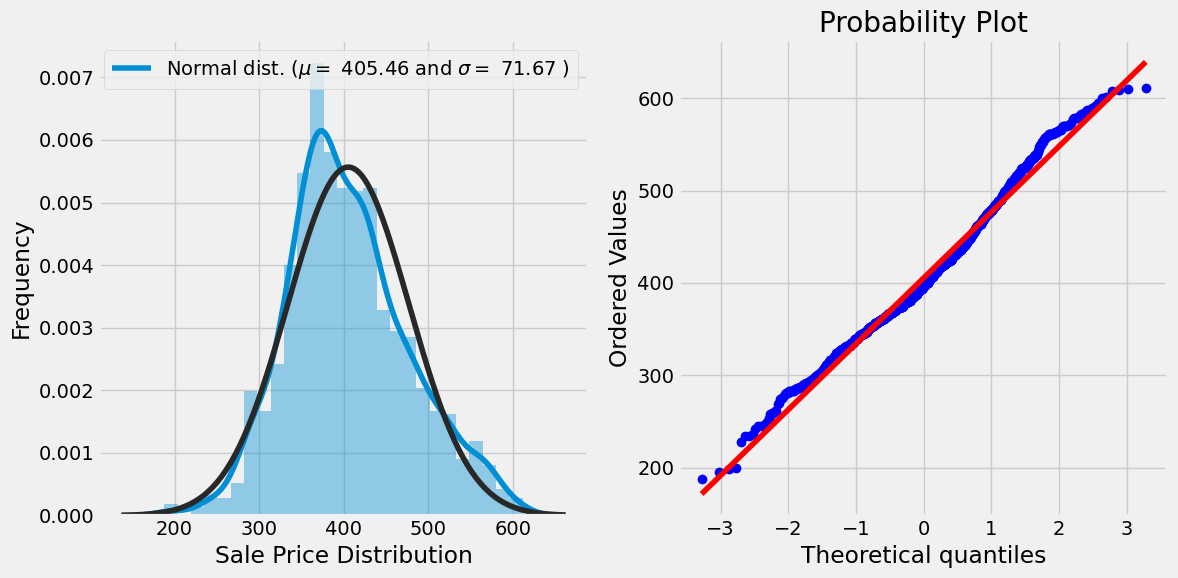

In [139]:
#converting the target Variable to Log to see if it can be normalized
log1p_sale_price = np.sqrt(housing_df['SalePrice'])

plot_distribution(log1p_sale_price)

We will go with a log transformation as that looks to be a better fit, as all the data points fit inside the normal curve, and the coeffecients are also within limits. 



In [140]:
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])

**BiVariate Analysis of Continuous Variable with Target Variable**

In [141]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
price = housing_numeric.pop('SalePrice')
print(len(housing_numeric.columns))
all_numeric_cols = housing_numeric.columns

housing_numeric.head()

13


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PropertyAge
0,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,5
1,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,31
2,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,7
3,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,91
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,8


In [142]:
housing_df.shape

(1340, 45)

# 4. Data Preparation

We will now prepare the data for Training. We will do the following steps 

1. Dummy Variables Creation for all Categorical Variables
2. Multi Collinearity Check
3. Break into train and test
4. Scale all Numeric Variables


**Dummy Variables Creation**

- *Bypassing the Curse of Dimensionality*
 - We will use OHE - for Nominal Varibles
 - We will use LabelEncoding for - Ordinal Variables
 - Ref - https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor


In [143]:
house_cat = housing_df.select_dtypes(include=['object'])
house_cat.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,Fence,MoSold,isRemodelled
0,60,RL,Reg,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,None,2,No
1,20,RL,Reg,FR2,Veenker,1Story,6,8,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,None,5,No
2,60,RL,IR1,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,None,9,Yes
3,70,RL,IR1,Corner,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,None,2,Yes
4,60,RL,IR1,FR2,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,None,12,No


In [144]:
housing_df['o_LotShape'] = housing_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
housing_df['o_ExterQual'] = housing_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_df['o_BsmtQual'] = housing_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_df['o_BsmtExposure'] = housing_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df['o_BsmtFinType1'] = housing_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing_df['o_HeatingQC'] = housing_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_df['o_KitchenQual'] = housing_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['o_FireplaceQu'] = housing_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['o_GarageFinish'] = housing_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_df['o_OverallQual'] = housing_df['OverallQual']
housing_df['o_OverallCond'] = housing_df['OverallCond']
housing_df['o_BsmtFullBath']=housing_df['BsmtFullBath']
housing_df['o_FullBath']=housing_df['FullBath']
housing_df['o_HalfBath']=housing_df['HalfBath']
housing_df['o_BedroomAbvGr']=housing_df['BedroomAbvGr']
housing_df['o_TotRmsAbvGrd']=housing_df['TotRmsAbvGrd']
housing_df['o_Fireplaces']=housing_df['Fireplaces']
housing_df['o_GarageCars']=housing_df['GarageCars']
housing_df['o_MoSold']=housing_df['MoSold']
housing_ordinal_col = ['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'OverallQual','OverallCond' ,'BsmtFullBath' , 'FullBath', \
                          'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',  'Fireplaces','GarageCars', 'MoSold']
final_df = housing_df.drop(housing_ordinal_col, axis=1)

final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,PropertyAge,isRemodelled,o_LotShape,o_ExterQual,o_BsmtQual,o_BsmtExposure,o_BsmtFinType1,o_HeatingQC,o_KitchenQual,o_FireplaceQu,o_GarageFinish,o_OverallQual,o_OverallCond,o_BsmtFullBath,o_FullBath,o_HalfBath,o_BedroomAbvGr,o_TotRmsAbvGrd,o_Fireplaces,o_GarageCars,o_MoSold
0,60,RL,65.0,8450,Inside,CollgCr,2Story,VinylSd,VinylSd,BrkFace,196.0,PConc,706,150,856,856,854,1710,Attchd,548,0,61,None,12.247694,5,No,3,4,4,1,6,5,4,0,2,7,5,1,2,1,3,8,0,2,2
1,20,RL,80.0,9600,FR2,Veenker,1Story,MetalSd,MetalSd,None,0.0,CBlock,978,284,1262,1262,0,1262,Attchd,460,298,0,None,12.109011,31,No,3,3,4,4,5,5,3,3,2,6,8,0,2,0,3,6,1,2,5
2,60,RL,68.0,11250,Inside,CollgCr,2Story,VinylSd,VinylSd,BrkFace,162.0,PConc,486,434,920,920,866,1786,Attchd,608,0,42,None,12.317167,7,Yes,2,4,4,2,6,5,4,3,2,7,5,1,2,1,3,6,1,2,9
3,70,RL,60.0,9550,Corner,Crawfor,2Story,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,540,756,961,756,1717,Detchd,642,0,35,None,11.849398,91,Yes,2,3,3,1,5,4,4,4,1,7,5,1,1,0,3,7,1,3,2
4,60,RL,84.0,14260,FR2,NoRidge,2Story,VinylSd,VinylSd,BrkFace,350.0,PConc,655,490,1145,1145,1053,2198,Attchd,836,192,84,None,12.429216,8,No,2,4,4,3,6,5,4,3,2,8,5,1,2,1,4,9,1,3,12


In [145]:

# subset all categorical variables

house_num = housing_df.select_dtypes(include=['float64','int64'])
housing_nominal_col =list(set(house_cat.columns)-set(housing_ordinal_col))


In [146]:
housing_nominal = house_cat[housing_nominal_col]

In [147]:
house_dummies = pd.get_dummies(housing_nominal, drop_first=True)
house_dummies.head()

,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,isRemodelled_Yes,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [148]:
final_df = final_df.drop(list(housing_nominal_col), axis=1)
# concat dummy variables with X
final_df = pd.concat([final_df, house_dummies], axis=1)

In [149]:
#Create a correlation matrix of the numeric Variables
corr = final_df[house_num.columns].corr()

corr

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,PropertyAge,o_LotShape,o_ExterQual,o_BsmtQual,o_BsmtExposure,o_BsmtFinType1,o_HeatingQC,o_KitchenQual,o_FireplaceQu,o_GarageFinish
LotFrontage,1.000000,0.530375,0.162473,0.114912,0.146078,0.299928,0.350328,0.023753,0.288693,0.312551,0.072691,0.140068,0.339874,-0.113494,-0.110457,0.103319,0.102349,0.096647,0.041680,0.069375,0.102168,0.185458,0.201792
LotArea,0.530375,1.000000,0.076111,0.155392,0.065506,0.265851,0.366062,0.074568,0.346636,0.282236,0.158900,0.093791,0.338878,-0.044616,-0.303068,0.053330,0.059128,0.147832,0.020448,0.028482,0.058862,0.236988,0.167592
MasVnrArea,0.162473,0.076111,1.000000,0.193512,0.093313,0.287147,0.265448,0.106351,0.296794,0.313886,0.119405,0.142201,0.359760,-0.297827,-0.044414,0.271101,0.218127,0.117789,0.187353,0.122291,0.228423,0.239849,0.230032
BsmtFinSF1,0.114912,0.155392,0.193512,1.000000,-0.549572,0.422625,0.343915,-0.208691,0.060794,0.219429,0.180737,0.033384,0.331463,-0.227313,-0.096611,0.125124,0.267882,0.322151,0.723218,0.048199,0.166650,0.127825,0.203203
BsmtUnfSF,0.146078,0.065506,0.093313,-0.549572,1.000000,0.450109,0.323756,-0.015349,0.235367,0.173413,-0.035622,0.154102,0.207681,-0.148292,-0.028199,0.267282,0.254984,-0.046982,-0.394571,0.200623,0.188161,0.143848,0.110739
TotalBsmtSF,0.299928,0.265851,0.287147,0.422625,0.450109,1.000000,0.770559,-0.276816,0.325250,0.426156,0.195734,0.198750,0.589381,-0.389050,-0.150832,0.403531,0.560510,0.329762,0.338660,0.248207,0.373488,0.293919,0.338853
1stFlrSF,0.350328,0.366062,0.265448,0.343915,0.323756,0.770559,1.000000,-0.325731,0.455957,0.419205,0.188794,0.157067,0.543887,-0.268691,-0.129263,0.313761,0.219239,0.222574,0.186695,0.156881,0.312670,0.351938,0.286493
2ndFlrSF,0.023753,0.074568,0.106351,-0.208691,-0.015349,-0.276816,-0.325731,1.000000,0.688145,0.108395,0.063252,0.219355,0.296199,-0.021868,-0.074335,0.172246,0.132142,-0.138367,-0.138222,0.130869,0.143651,0.190350,0.145412
GrLivArea,0.288693,0.346636,0.296794,0.060794,0.235367,0.325250,0.455957,0.688145,1.000000,0.415707,0.202826,0.326293,0.686363,-0.211733,-0.166334,0.396276,0.288138,0.035693,0.004933,0.238296,0.367036,0.443877,0.346423
GarageArea,0.312551,0.282236,0.313886,0.219429,0.173413,0.426156,0.419205,0.108395,0.415707,1.000000,0.199998,0.244090,0.621337,-0.478040,-0.157936,0.435486,0.361214,0.203653,0.191278,0.266060,0.433762,0.270732,0.500906


**MultiVariate Correlation Analysis of Continous Variables**

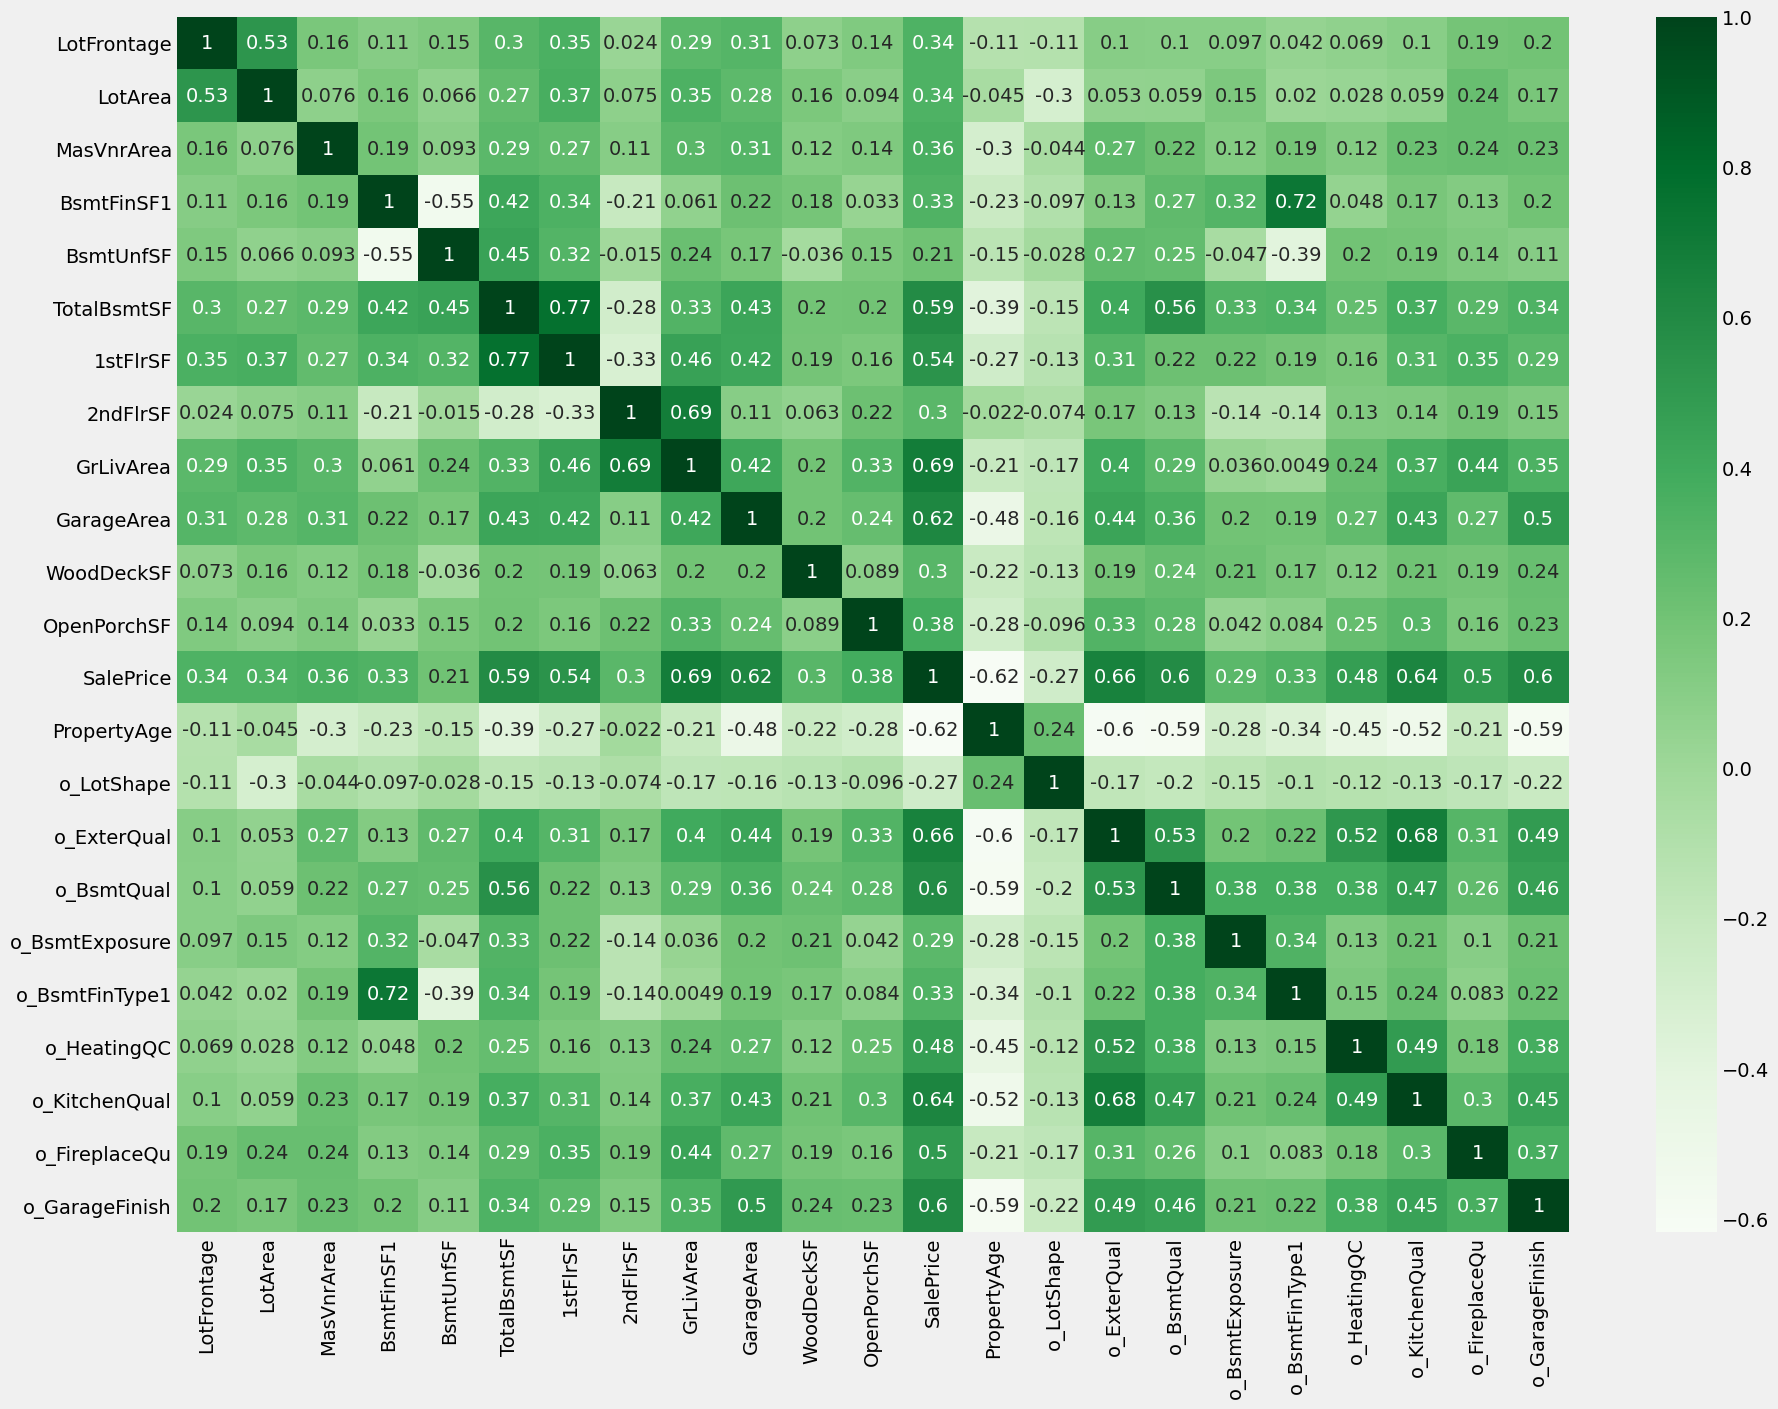

In [150]:
#Plot the heat map

# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(corr, cmap='Greens', annot=True)
plt.show()

**Observations**

***Correlation to the Target Variable***
- SalePrice has a positive Corelation to GrLivArea- (Living Area on the Ground Floor)
- SalePrice is quite Correlated to the Garage Area
- SalePrice is loosely Correlated to the Basement and FirstFloor Square Feet

***MutiCollinearity Indicators***
- TotalBsmtSt is Correlated to 1stFlrSF by 0.77. So we will be dropping 1stFlrSF
- GrLivArea is Correlated to 2ndFlrSF by 0.69, So we will be dropping 2ndFlrSF
- o_BsmtFinType1 is Correlated to BsmtFinSF1 by 0.72. So we will be dropping BsmtFinSF1


In [151]:
final_df = final_df.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1'], axis=1)

In [152]:
final_df.shape

(1340, 131)

We now have 130 Features in the final df. We will break into train and test scale them appropriately

In [153]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Columns: 131 entries, LotFrontage to MasVnrType_Stone
dtypes: float64(3), int64(17), object(10), uint8(101)
memory usage: 456.7+ KB


**Train Test Split**

In [154]:
##split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(final_df, train_size=0.7, test_size = 0.3, random_state=100)

**Scale all the Numeric Variables**

In [155]:
#we will scale all the Ordinal Categorical Variables, and the Numeric variables
#All the variables which are boolean will not need to be scaled
#Filtering out the binary columens
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(final_df)
print(binary_cols)

['Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_None', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5

In [156]:

##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [157]:
print(df_train.shape)
print(df_test.shape)

(937, 131)
(402, 131)


In [158]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [159]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

# 5. Variable Selection using RFE

We will now use RFE to reduce the no of variables to 50% of the existing using RFE. So from 130 variables we will try to reduce the number of 65 variables

In [166]:
#Common Imports
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [167]:
#Initialization of SM and RFE


lm = LinearRegression()
lm.fit(X_train,y_train)

#Lets start with a list of 65 variables
rfe= RFE(lm,65)
rfe = rfe.fit(X_train, y_train)

#Now we will use this and check for the R2 and other metrics using stats model

import statsmodels.api as sm
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)

lm  = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:50:38   Log-Likelihood:                -179.59
No. Observations:                 937   AIC:                             487.2
Df Residuals:                     873   BIC:                             797.1
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3347      0.247     -5.411      0.000      -1.819      -0.851
BsmtUnfSF               -0.1032      0.012     -8.449      0.000      -0.127      -0.079
TotalBsmtSF              0.2042      0.017     12.066      0.000       0.171       0.237
GrLivArea                0.3935      0.019     21.258      0.000       0.357       0.430
PropertyAge             -0.2192      0.025     -8.621      0.000      -0.269      -0.169
o_KitchenQual            0.0551      0.015      3.757      0.000       0.026       0.084
o_OverallQual            0.1654      0.019      8.660      0.000       0.128       0.203
o_OverallCond            0.1546      0.012     12.394      0.000       0.130       0.179
o_GarageCars             0.1099      0.018      6.268      0.000       0.075       0.144
Exterior1st_BrkFace      0.1763      0.062      2.862      0.004       0.055       0.297
Exterior1st_CBlock      -0.0805      0.156     -0.516      0.606      -0.387       0.226
Exterior1st_Stone       -0.2824      0.234     -1.205      0.228      -0.742       0.178
Exterior1st_Stucco       0.2639      0.187      1.413      0.158      -0.103       0.631
Exterior1st_VinylSd     -0.1654      0.110     -1.508      0.132      -0.381       0.050
Exterior1st_Wd Sdng     -0.1323      0.065     -2.046      0.041      -0.259      -0.005
Neighborhood_Crawfor     0.3489      0.063      5.543      0.000       0.225       0.472
Neighborhood_Edwards    -0.0995      0.046     -2.159      0.031      -0.190      -0.009
Neighborhood_MeadowV    -0.2294      0.148     -1.555      0.120      -0.519       0.060
Neighborhood_Mitchel    -0.0767      0.064     -1.202      0.230      -0.202       0.049
Neighborhood_NAmes      -0.0748      0.038     -1.981      0.048      -0.149      -0.001
Neighborhood_NPkVill    -0.1386      0.162     -0.856      0.392      -0.456       0.179
Neighborhood_NWAmes     -0.1756      0.051     -3.423      0.001      -0.276      -0.075
Neighborhood_NridgHt     0.2308      0.061      3.809      0.000       0.112       0.350
Neighborhood_OldTown    -0.2351      0.054     -4.357      0.000      -0.341      -0.129
Neighborhood_Sawyer     -0.0823      0.051     -1.608      0.108      -0.183       0.018
Neighborhood_Somerst     0.2864      0.100      2.873      0.004       0.091       0.482
Neighborhood_StoneBr     0.1249      0.099      1.261      0.208      -0.069       0.319
Fence_GdWo              -0.1545      0.052     -2.972      0.003      -0.257      -0.052
HouseStyle_2.5Fin       -0.4738      0.199     -2.382      0.017      -0.864      -0.083
HouseStyle_2Story        0.0805      0.057      1.406      0.160      -0.032       0.193
HouseStyle_SFoyer        0.2685      0.140      1.920      0.055      -0.006       0.543
HouseStyle_SLvl          0.5036      0.183      2.753    

**Observation**

This model gives an R2 or 0.91 and a FStatistic of close to Zero. So it could be a good model. There are few multi collinearity warnings, which will get remediated as we regularize the model

We shall use this model to do ridge and lasso regularization

In [168]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('PropertyAge', True, 1),
 ('o_KitchenQual', True, 1),
 ('o_OverallQual', True, 1),
 ('o_OverallCond', True, 1),
 ('o_GarageCars', True, 1),
 ('Exterior1st_BrkFace', True, 1),
 ('Exterior1st_CBlock', True, 1),
 ('Exterior1st_Stone', True, 1),
 ('Exterior1st_Stucco', True, 1),
 ('Exterior1st_VinylSd', True, 1),
 ('Exterior1st_Wd Sdng', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_MeadowV', True, 1),
 ('Neighborhood_Mitchel', True, 1),
 ('Neighborhood_NAmes', True, 1),
 ('Neighborhood_NPkVill', True, 1),
 ('Neighborhood_NWAmes', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_OldTown', True, 1),
 ('Neighborhood_Sawyer', True, 1),
 ('Neighborhood_Somerst', True, 1),
 ('Neighborhood_StoneBr', True, 1),
 ('Fence_GdWo', True, 1),
 ('HouseStyle_2.5Fin', True, 1),
 ('HouseStyle_2Story', True, 1),
 ('HouseStyle_SFoyer', True, 1),
 ('HouseStyle_SLvl', T

In [169]:
 ##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top65_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top65_df = top65_df.loc[top65_df['rfe_support'] == True]
top65_df.reset_index(drop=True, inplace=True)
top65_df

,Features,rfe_support,rfe_ranking
0,BsmtUnfSF,True,1
1,TotalBsmtSF,True,1
2,GrLivArea,True,1
3,PropertyAge,True,1
4,o_KitchenQual,True,1
5,o_OverallQual,True,1
6,o_OverallCond,True,1
7,o_GarageCars,True,1
8,Exterior1st_BrkFace,True,1
9,Exterior1st_CBlock,True,1


In [170]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]

##Let's Assign top 50 columns to X_train_rfe
X_train_rfe = X_train[col_rfe_sup]

In [171]:
##Making sure that we have only 65 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# 6. Ridge Regression

In [172]:
from sklearn.model_selection import KFold
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation
kf = KFold(n_splits=5, random_state=100, shuffle=False)
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,0.6,-0.207773,-0.227081,1
9,0.7,-0.207960,-0.227087,2
7,0.5,-0.207579,-0.227092,3
10,0.8,-0.208136,-0.227111,4
11,0.9,-0.208304,-0.227136,5
6,0.4,-0.207402,-0.227149,6
12,1,-0.208462,-0.227153,7
5,0.3,-0.207243,-0.227235,8
13,2,-0.209751,-0.227312,9
4,0.2,-0.207102,-0.227379,10


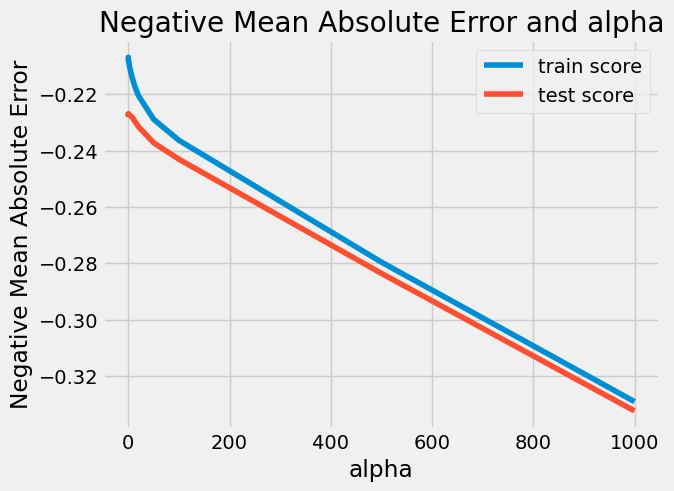

In [174]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [175]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=0.6)

In [176]:
##Checking the coefficient values with lambda (alpha) = 4

ridge = Ridge(alpha=3)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.496244155554524
Coefficients:
 [-0.10459581  0.20595205  0.38057833 -0.21738698  0.05490222  0.19253261
  0.16002787  0.10482563  0.16367197 -0.03290004 -0.11678799  0.07693184
 -0.08152132 -0.08996589  0.33018128 -0.0574777  -0.19518126 -0.05732212
 -0.04779185 -0.05462868 -0.15241719  0.19081083 -0.18249629 -0.06053911
  0.2854013   0.07889574 -0.12010867 -0.20285821  0.03999213  0.03424715
  0.13954762  0.07989976 -0.09589783  0.29094753  0.0790016   0.33934204
  0.1746514   0.04510132 -0.02454621 -0.02627529 -0.08223689 -0.00841243
 -0.18129099 -0.41490507 -0.1382733   0.08300122  0.04613819 -0.03537304
  0.07799341 -0.03290004 -0.07985455  0.         -0.10705724 -0.07660441
  0.08806436  0.08580129  0.09211954 -0.00118458  0.09435267  0.01675725
  0.03245289 -0.06602415  0.10726089  0.10428287  0.13243281]


In [81]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,MSSubClass_160,-0.3915,0.3915
1,GrLivArea,0.3805,0.3805
2,Neighborhood_Crawfor,0.3403,0.3403
3,MSZoning_RL,0.3232,0.3232
4,Neighborhood_Somerst,0.2953,0.2953
5,MSZoning_FV,0.2793,0.2793
6,PropertyAge,-0.2602,0.2602
7,Neighborhood_NridgHt,0.2131,0.2131
8,TotalBsmtSF,0.2098,0.2098
9,o_OverallQual,0.2058,0.2058


**Model Prediction and Evaluation Metrics:**

In [82]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=3.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=3.0):
 ****************************************

For Train Set:
R2 score: 0.9095932374707519 
MSE score: 0.09040676252924808 
MAE score: 0.213208121205314 
RMSE score: 0.3006771732760039

For Test Set:
R2 score: 0.8850510612554339 
MSE score: 0.11404852814842445 
MAE score: 0.2357033888949298 
RMSE score: 0.337710716662093 
 ****************************************


**For Train Set**

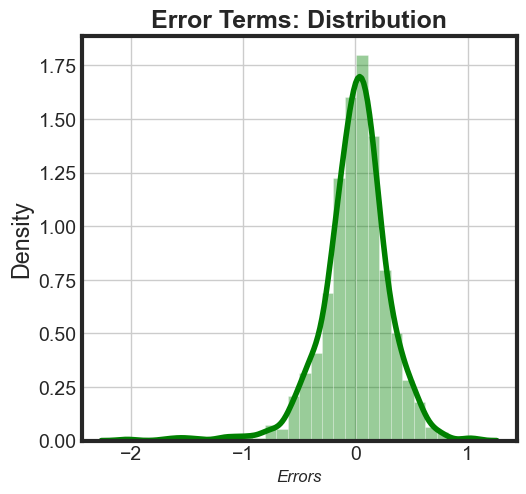

In [83]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**Observation** :
    Error Terms seem to be normally distributed. So our assumptions are true

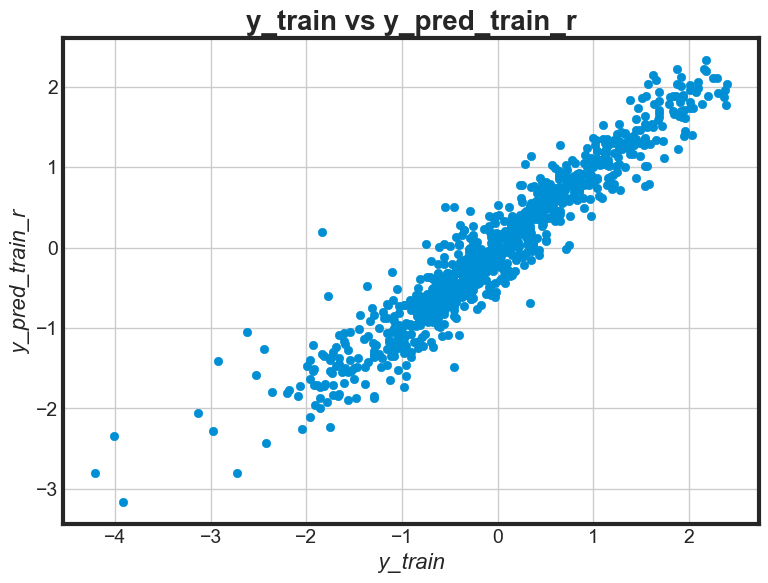

In [84]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [85]:
y_train.shape

(937,)

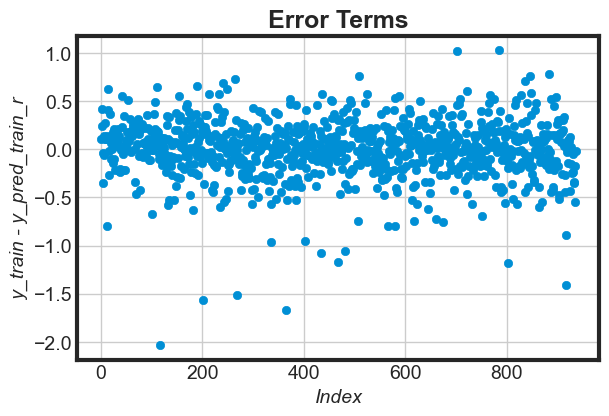

In [86]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,937,1)] #For 937 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

**Observation**
  - Residuals are heteroscedastic and scattered around y=0.  So our assumption is true

**For Test Set**

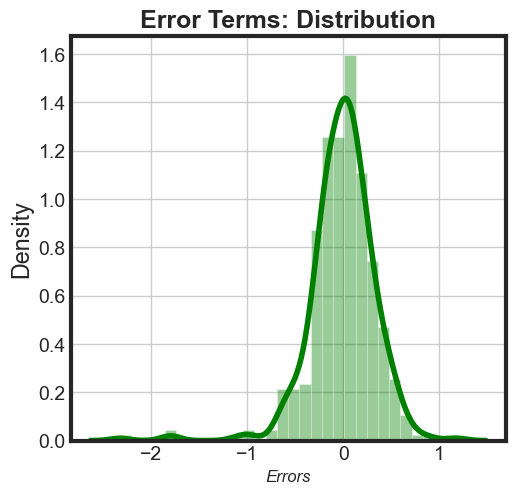

In [87]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

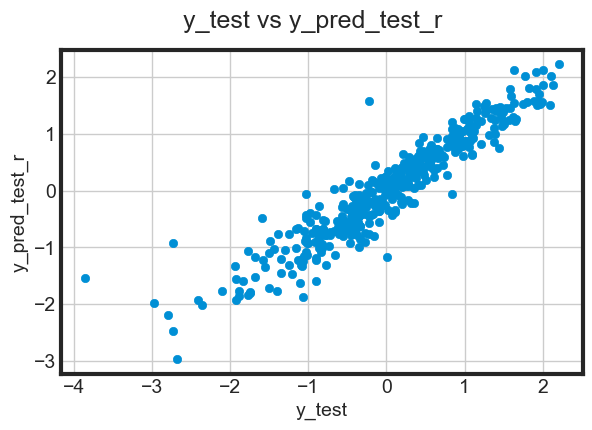

In [88]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

In [89]:
y_test.shape

(402,)

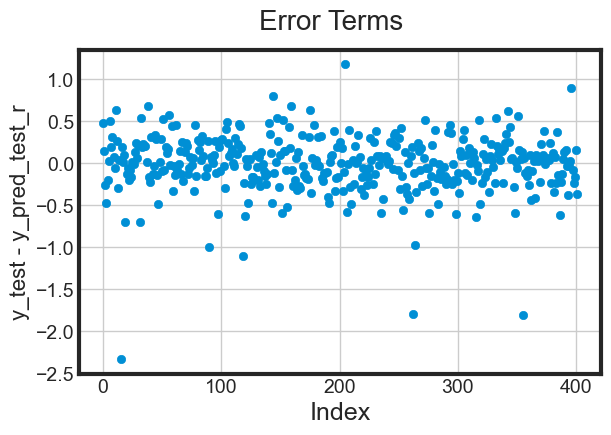

In [90]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,402,1)] #For 402 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

**Observation** 
- The residuals are scattered along (y=0) and are independent of each other.
- The residuals are heteroscedastic

# 7. Lasso Regression

In [91]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.0007,-0.213998,-0.230906,1
5,0.0006,-0.213428,-0.230923,2
7,0.0008,-0.214444,-0.230961,3
4,0.0005,-0.212700,-0.230975,4
8,0.0009,-0.214833,-0.231009,5
9,0.001,-0.215166,-0.231107,6
3,0.0003,-0.210886,-0.231449,7
10,0.002,-0.218753,-0.231738,8
2,0.0002,-0.209832,-0.231862,9
1,0.0001,-0.208881,-0.232059,10


In [93]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
7,0.0007,-0.213998,-0.230906,1
6,0.0006,-0.213428,-0.230923,2
8,0.0008,-0.214444,-0.230961,3
5,0.0005,-0.212700,-0.230975,4
9,0.0009,-0.214833,-0.231009,5
10,0.001,-0.215166,-0.231107,6
4,0.0004,-0.211838,-0.231157,7
3,0.0003,-0.210886,-0.231449,8
11,0.002,-0.218753,-0.231738,9
2,0.0002,-0.209832,-0.231862,10


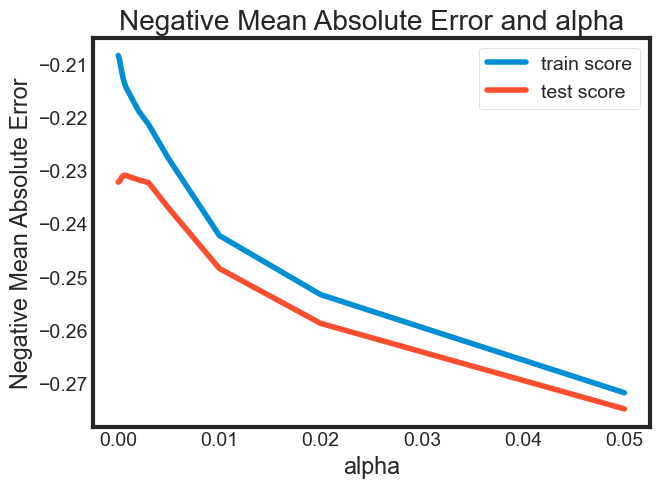

In [95]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [96]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0007)

In [97]:
# check the coefficient values with lambda = 0.0006

lasso = Lasso(alpha=0.0006)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.4512850036971435
Coefficients:
  [-0.10464939  0.20651959  0.38142356 -0.26226364  0.20904656  0.17557477
  0.11461774  0.02295332 -0.02312342 -0.22085387  0.          0.
 -0.          0.03279386  0.09177636  0.          0.07988816  0.
  0.04337443  0.          0.03020975  0.07622782 -0.          0.
 -0.20050658 -0.42355213 -0.0953497   0.10781883  0.0933047   0.
 -0.          0.354432   -0.01742309 -0.16844699 -0.04732645 -0.
 -0.13867892  0.21516805 -0.14570169  0.30968042  0.10768256  0.30293363
  0.0782971   0.34721501  0.19422341 -0.12029854  0.         -0.
 -0.03169603 -0.          0.01201089  0.05459718 -0.          0.
  0.18357989 -0.         -0.          0.         -0.         -0.0507464
  0.03103836  0.02405661  0.04877204  0.05883537 -0.        ]


In [98]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.0006):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.0006):
 ****************************************

For Train Set:
R2 score: 0.9084655295543802 
MSE score: 0.09153447044561983 
MAE score: 0.2151612010608167 
RMSE score: 0.30254664176886814

For Test Set:
R2 score: 0.8857383229067057 
MSE score: 0.11336664991069162 
MAE score: 0.2357883771466149 
RMSE score: 0.33669964346683173 
 ****************************************


In [99]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,MSSubClass_160,-0.4236,0.4236
1,GrLivArea,0.3814,0.3814
2,Neighborhood_Crawfor,0.3544,0.3544
3,MSZoning_RL,0.3472,0.3472
4,Neighborhood_Somerst,0.3097,0.3097
5,MSZoning_FV,0.3029,0.3029
6,PropertyAge,-0.2623,0.2623
7,HouseStyle_2.5Fin,-0.2209,0.2209
8,Neighborhood_NridgHt,0.2152,0.2152
9,o_OverallQual,0.2090,0.2090


**Residual Analysis of Model**


**Train Set**

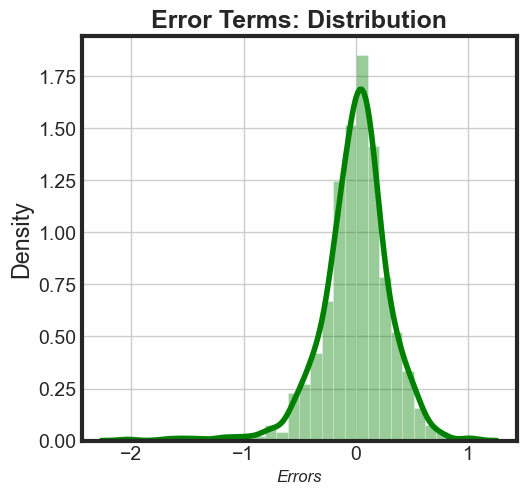

In [100]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_l)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**Observation** 
- The Error Terms are normally distributed with Mean of 0 and Std Deviation of 
- The Assumption is Valid

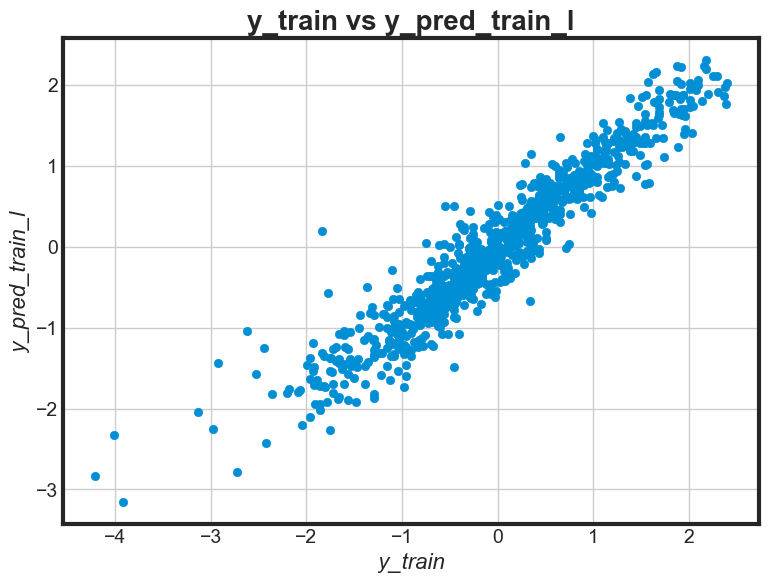

In [101]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [102]:
y_train.shape

(937,)

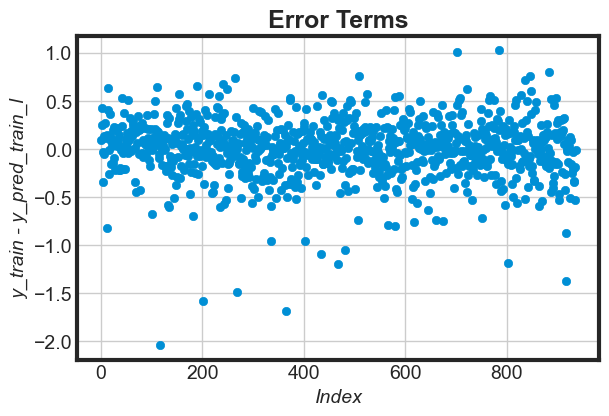

In [103]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,937,1)] #For 937 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

**Observation**
- Residuals are heteroscedastic
- They are centered around y=0
- Assumptions are valid

**For Test Set**

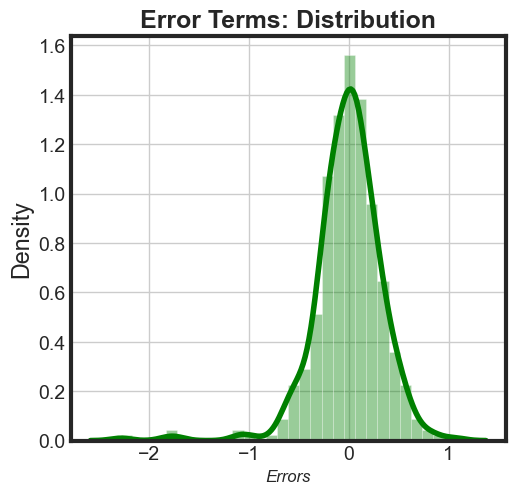

In [104]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**Observation**
- Errors for the Predicted Variables have a mean of 0 and std deviation of 1
- Assumptions are valid

In [105]:
y_test.shape

(402,)

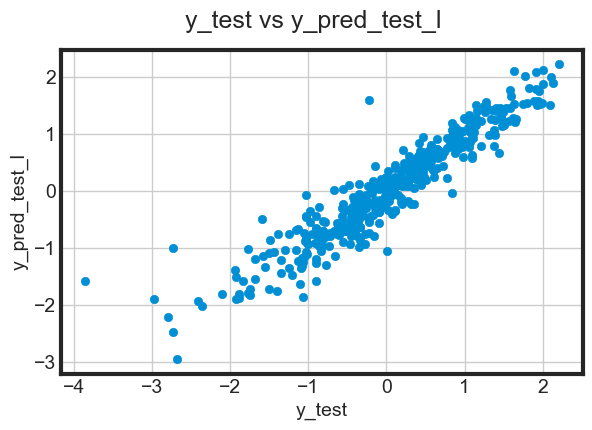

In [106]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()


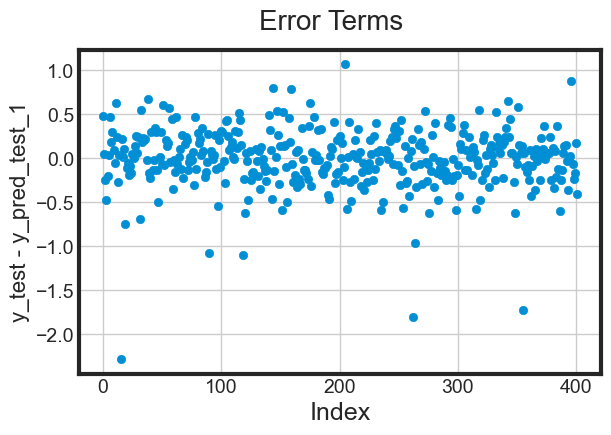

In [107]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,402,1)] #For 402 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

**Observation**
- Residuals are heteroscedastic
- They are centered around y=0
- Assumptions are valid

# 8. Answers to Questions


- What is the optimal value of alpha for ridge and lasso regression? 
- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Based on the above analysis Optimal Value Alpha 
- for Ridge Regression is -3
- for Lasso Regression is - 0.0006

**RIDGE REGRESSION**

In [108]:
##Checking the outcome: coefficient values with double the value of alpha = 8*2 = 16

ridge = Ridge(alpha=9)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.3455346050919885
Coefficients:
 [-0.10580447  0.21109846  0.37334233 -0.24710475  0.221204    0.17520512
  0.12032579  0.05159955 -0.00159501 -0.09665149  0.02997313  0.01289397
 -0.00836259  0.05697399  0.10045631  0.00434744  0.09389741  0.00327194
  0.03791414  0.0289918   0.05891566  0.09076927 -0.00420551  0.02470858
 -0.14843037 -0.31356793 -0.06836657  0.09775238  0.10317222  0.02457533
 -0.02148797  0.28767844 -0.0268643  -0.11087491 -0.05315516 -0.03552974
 -0.12748111  0.16089455 -0.12650293  0.22798785  0.0652814   0.16752312
 -0.01501695  0.19275697  0.00991468 -0.10673995  0.02451457 -0.01704792
 -0.04057151 -0.02494626  0.05651367  0.05973625 -0.01659594  0.01072784
  0.15731515 -0.01704792 -0.03767829  0.03705709 -0.03354701 -0.05527912
  0.04544524  0.04682202  0.07729546  0.06210707 -0.04203047]


In [109]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha3*3=9):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha3*3=9):
 ****************************************

For Train Set:
R2 score: 0.9065897473031189 
MSE score: 0.09341025269688107 
MAE score: 0.21656018558555346 
RMSE score: 0.30563090926292297

For Test Set:
R2 score: 0.8853082408785068 
MSE score: 0.1137933630481497 
MAE score: 0.2355553289976496 
RMSE score: 0.33733271861494507 
 ****************************************


In [110]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,GrLivArea,0.3733,0.3733
1,MSSubClass_160,-0.3136,0.3136
2,Neighborhood_Crawfor,0.2877,0.2877
3,PropertyAge,-0.2471,0.2471
4,Neighborhood_Somerst,0.2280,0.2280
5,o_OverallQual,0.2212,0.2212
6,TotalBsmtSF,0.2111,0.2111
7,MSZoning_RL,0.1928,0.1928
8,o_OverallCond,0.1752,0.1752
9,MSZoning_FV,0.1675,0.1675


In [111]:
print("For Ridge Regression (Doubled alpha model, alpha=3*3=9): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(ridge_df['Features'].head(10)),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=3*3=9): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['GrLivArea', 'MSSubClass_160', 'Neighborhood_Crawfor', 'PropertyAge', 'Neighborhood_Somerst', 'o_OverallQual', 'TotalBsmtSF', 'MSZoning_RL', 'o_OverallCond', 'MSZoning_FV'] 
 *****************************************************************************************************************************


**LASSO REGRESSION**

In [112]:
##Checking the outcome: coefficient values with double the value of alpha = 0.0006*2 = 0.0012 (For Lasso Regression)

lasso_double = Lasso(alpha=0.0012)
        
lasso_double.fit(X_train, y_train) 
print("Intercept: ", lasso_double.intercept_)
print("Coefficients:\n ", lasso_double.coef_)

Intercept:  -0.2513452532555762
Coefficients:
  [-0.10399149  0.20779265  0.37788191 -0.25732233  0.22310359  0.17714677
  0.11942489  0.         -0.02358893 -0.06819293  0.          0.
 -0.          0.01093562  0.0709865  -0.          0.05366443  0.
  0.02146262  0.          0.01771749  0.04302828  0.          0.
 -0.19117001 -0.38087842 -0.01105951  0.06287837  0.09323155  0.
 -0.          0.33446952 -0.0030911  -0.13093512 -0.018109   -0.
 -0.12810808  0.1854658  -0.11139449  0.30210221  0.03033602  0.12464573
 -0.          0.19756336  0.01777335 -0.10026963  0.         -0.
 -0.         -0.          0.01123383  0.01523171 -0.          0.
  0.17013725 -0.         -0.          0.          0.         -0.01114829
  0.          0.          0.00768041  0.04186829 -0.        ]


In [113]:
#RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso_double.predict(X_train)
y_pred_test_l = lasso_double.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.0006*2 = 0.0012)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.0006*2 = 0.0012)
 ****************************************

For Train Set:
R2 score: 0.9058031891846979 
MSE score: 0.09419681081530208 
MAE score: 0.21733344223389198 
RMSE score: 0.30691498955786123

For Test Set:
R2 score: 0.8844654846413315 
MSE score: 0.11462951786164767 
MAE score: 0.23752018319362248 
RMSE score: 0.33856981238977535 
 ****************************************


In [114]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso_double.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso_double.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,MSSubClass_160,-0.3809,0.3809
1,GrLivArea,0.3779,0.3779
2,Neighborhood_Crawfor,0.3345,0.3345
3,Neighborhood_Somerst,0.3021,0.3021
4,PropertyAge,-0.2573,0.2573
5,o_OverallQual,0.2231,0.2231
6,TotalBsmtSF,0.2078,0.2078
7,MSZoning_RL,0.1976,0.1976
8,MSSubClass_90,-0.1912,0.1912
9,Neighborhood_NridgHt,0.1855,0.1855


In [115]:
print("For Lasso Regression (Doubled alpha model: alpha:0.006*2 = 0.0012): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(lasso_df['Features'].head(10)),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.006*2 = 0.0012): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['MSSubClass_160', 'GrLivArea', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'PropertyAge', 'o_OverallQual', 'TotalBsmtSF', 'MSZoning_RL', 'MSSubClass_90', 'Neighborhood_NridgHt'] 
 *****************************************************************************************************************************


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [116]:
lasso_top_5 = ['MSSubClass_160','GrLivArea','Neighborhood_Crawfor','Neighborhood_Somerst','MSZoning_RL']

print("The Top 5 Features to be removed are : \n","*"*125)
print(list(lasso_top_5))

The Top 5 Features to be removed are : 
 *****************************************************************************************************************************
['MSSubClass_160', 'GrLivArea', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'MSZoning_RL']


In [117]:
X_train_drop_5= X_train.drop(lasso_top_5, axis=1)

In [118]:
X_test_drop_5 = X_test.drop(lasso_top_5, axis=1)

In [119]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_drop_5, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.276900,-0.297306,1
5,0.0006,-0.277813,-0.297389,2
6,0.0007,-0.278711,-0.297617,3
3,0.0003,-0.274921,-0.297757,4
7,0.0008,-0.279489,-0.298001,5
2,0.0002,-0.274010,-0.298313,6
8,0.0009,-0.280263,-0.298415,7
9,0.001,-0.281049,-0.298722,8
1,0.0001,-0.273373,-0.299102,9
0,1e-05,-0.273012,-0.300067,10


In [121]:
##Plotting a magnified graph for a lower range of alpha.

lasso_remove_5 = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv_remove_5 = GridSearchCV(estimator = lasso_remove_5,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_remove_5.fit(X_train_drop_5, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [122]:
lasso_cv_results = pd.DataFrame(lasso_model_cv_remove_5.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0004,-0.275954,-0.297220,1
5,0.0005,-0.276900,-0.297306,2
6,0.0006,-0.277813,-0.297389,3
7,0.0007,-0.278711,-0.297617,4
3,0.0003,-0.274921,-0.297757,5
8,0.0008,-0.279489,-0.298001,6
2,0.0002,-0.274010,-0.298313,7
9,0.0009,-0.280263,-0.298415,8
10,0.001,-0.281049,-0.298722,9
1,0.0001,-0.273373,-0.299102,10


In [123]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [124]:
# check the coefficient values with lambda = 0.0005

lasso_remove_5 = Lasso(alpha=0.0005)
        
lasso_remove_5.fit(X_train_drop_5, y_train) 
print("Intercept: ",lasso_remove_5.intercept_)
print("Coefficients:\n ",lasso_remove_5.coef_)

Intercept:  -0.04443489468233704
Coefficients:
  [-0.10978169  0.37370054 -0.15863018  0.30489941  0.17838745  0.19478469
 -0.25964822 -0.30176184  0.39444369  0.24664734  0.15208123 -0.37444087
 -0.0978154   0.13002701  0.          0.35226406 -0.00634079 -0.06876229
  0.24327102  0.16269971  0.30559267 -0.01054315  0.03098378  0.13204748
  0.          0.20742754  0.09890672  0.         -0.         -0.
 -0.1928259  -0.10274954 -0.34747248 -0.0957729   0.09674413 -0.11232377
  0.          0.06597684 -0.127313   -0.35924312 -0.09200543  0.
 -0.          0.0922971  -0.          0.20966175  0.03606425  0.08119951
  0.0618298   0.31480716 -0.          0.31476289  0.13283003 -0.16525322
 -0.          0.05762658  0.0438479   0.07723023  0.08794549 -0.14416568]


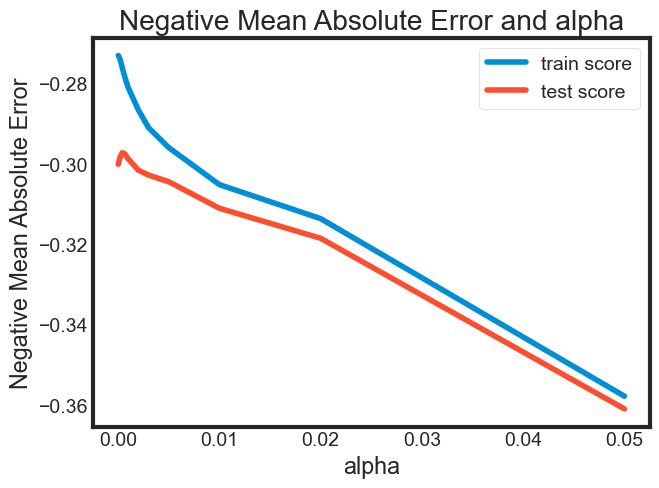

In [125]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [126]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso_remove_5.predict(X_train_drop_5)
y_pred_test_l = lasso_remove_5.predict(X_test_drop_5)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Remove 5 Model: alpha=0.0001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Remove 5 Model: alpha=0.0001):
 ****************************************

For Train Set:
R2 score: 0.8555923382201138 
MSE score: 0.1444076617798862 
MAE score: 0.27936268052613156 
RMSE score: 0.38001008115560064

For Test Set:
R2 score: 0.8373254916911049 
MSE score: 0.16140025686644413 
MAE score: 0.2814861976639242 
RMSE score: 0.4017465082193548 
 ****************************************


In [127]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_drop_5.columns, 'Coefficient':lasso_remove_5.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso_remove_5.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,HouseStyle_2.5Fin,0.3944,0.3944
1,HouseStyle_SFoyer,-0.3744,0.3744
2,TotalBsmtSF,0.3737,0.3737
3,MSZoning_RM,-0.3592,0.3592
4,GarageType_BuiltIn,0.3523,0.3523
5,Neighborhood_NPkVill,-0.3475,0.3475
6,Exterior1st_Stone,0.3148,0.3148
7,Exterior1st_BrkFace,0.3148,0.3148
8,MSSubClass_70,0.3056,0.3056
9,o_OverallQual,0.3049,0.3049


In [128]:
print("For Lasso Regression (Remove 5 features model: alpha:0.0001): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(lasso_df['Features'].head(10)),"\n", "*"*125)

For Lasso Regression (Remove 5 features model: alpha:0.0001): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'TotalBsmtSF', 'MSZoning_RM', 'GarageType_BuiltIn', 'Neighborhood_NPkVill', 'Exterior1st_Stone', 'Exterior1st_BrkFace', 'MSSubClass_70', 'o_OverallQual'] 
 *****************************************************************************************************************************


**Residual Analysis**

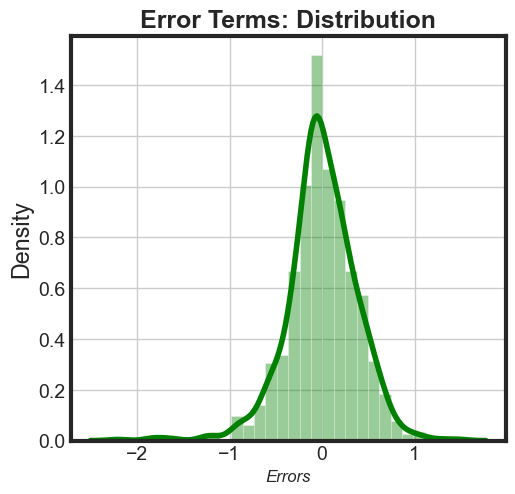

In [129]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_l)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

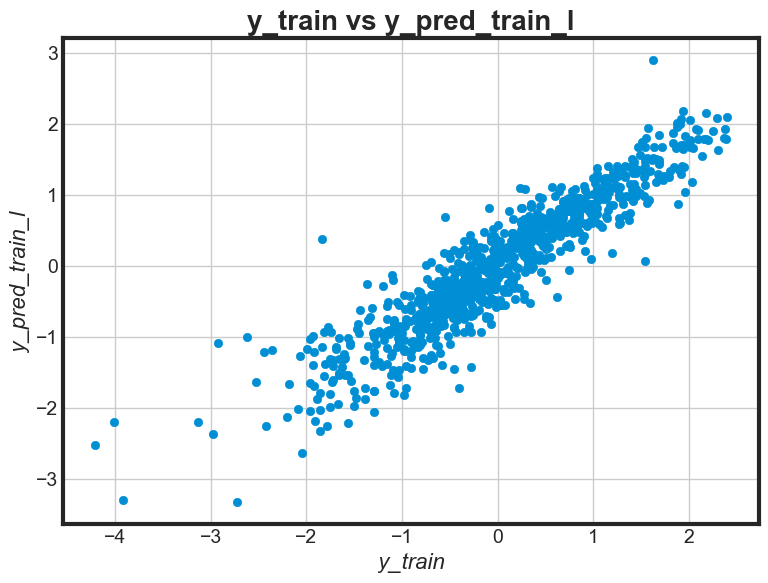

In [130]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

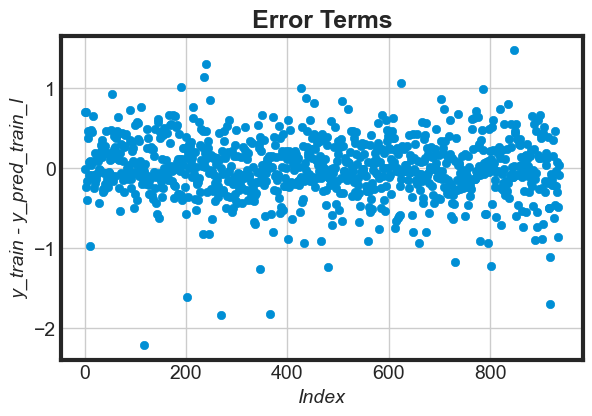

In [131]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,937,1)] #For 937 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()